<a href="https://colab.research.google.com/github/yujiimt/time_series/blob/master/AR%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ARモデル
ある時点の出力が過去の出力の線形結合として得られる場合、これを表すモデルを   
**自己回帰モデル**と呼ぶ

ARモデルはある一定値の周りで一定のパターンを繰り返すデータをモデリングするのに向いている

※後日追記

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

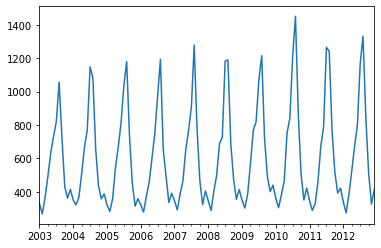

In [4]:
icecream = pd.read_csv('/content/icecream.csv')

y = pd.Series(icecream.expenditure_yen.values, 
              index = pd.date_range('2003-1', periods = len(icecream), freq ='M'))

y.plot()

ARモデルは定常仮定にしか適用できない    
データが定常過程であるかどうか調べる必要がある  
定常仮定であるかの確認は**ADF検定**により行える    


In [5]:
from statsmodels.tsa import stattools


#トレンド項あり（２次まで）、定数項ありの場合
ctt = stattools.adfuller(y[:100], regression = 'ctt')
#トレンド項あり（１次）、定数項ありの場合
ct = stattools.adfuller(y[:100], regression = 'ct')
#トレンド項なし、定数項ありの場合
c = stattools.adfuller(y[:100], regression = 'c')
#トレンド項なし、定数項なし
nc = stattools.adfuller(y[:100], regression = 'nc')


print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.3089558508822066, 0.1692244861968651, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484145)
ct:
(-1.714560199971079, 0.7444294601457553, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c:
(-0.6539247687694223, 0.8583259363632658, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc:
(1.6310949179759076, 0.9751761218376866, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328066)


タプル内の２番目の要素が検定のp値である   
４つとも高い値のため、単位根過程であるという仮説を棄却できない   
したがって、このデータは定常過程ではない   
ARモデルで使用できるように。１次階差をとり定常過程に変換する

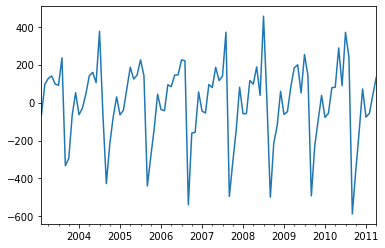

In [6]:
 y_diff = y.diff()[:100].dropna()
 y_diff.plot()

In [7]:
ctt = stattools.adfuller(y_diff, regression='ctt')
ct = stattools.adfuller(y_diff, regression='ct')
c = stattools.adfuller(y_diff, regression='c')
nc = stattools.adfuller(y_diff, regression='nc')
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-20.49413879057406, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214956)
ct:
(-20.51282538674093, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902557)
c:
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415186)
nc:
(-20.337724459102365, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068397)


In [0]:
from statsmodels.tsa import  ar_model

model = ar_model.AR(y_diff)

赤池情報漏について後日追記

In [9]:
for i in range(20):
  results = model.fit(maxlag = i+1)
  print('lag = ', i+1, 'aic : ', results.aic)


lag =  1 aic :  10.623349835083612
lag =  2 aic :  10.605625887136187
lag =  3 aic :  10.631794365499909
lag =  4 aic :  10.653968819566964
lag =  5 aic :  10.639020494849978
lag =  6 aic :  10.497805079154896
lag =  7 aic :  10.50164556083358
lag =  8 aic :  10.347418412668333
lag =  9 aic :  10.145773136713263
lag =  10 aic :  9.547393191591683
lag =  11 aic :  8.688494352586085
lag =  12 aic :  8.726168706454176
lag =  13 aic :  8.749080458269447
lag =  14 aic :  8.787463716774608
lag =  15 aic :  8.822181088075927
lag =  16 aic :  8.861619646480914
lag =  17 aic :  8.900710667979508
lag =  18 aic :  8.712739176754758
lag =  19 aic :  8.74636247304398
lag =  20 aic :  8.766450545272324


In [0]:
#モデルのあてはめ
result = model.fit(maxlag = 12, ic = 'aic')

In [11]:
result.k_ar

11

<BarContainer object of 88 artists>

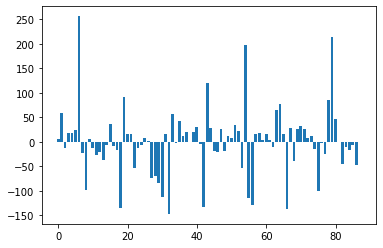

In [12]:
#残差
res = result.resid

#残差の出力
plt.bar(range(len(res)), res)

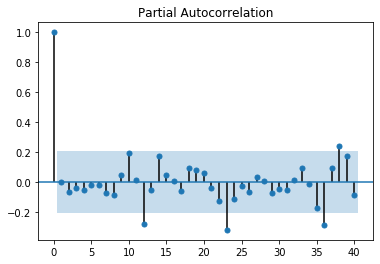

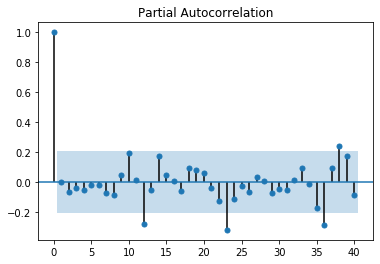

In [13]:
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res, lags = 40)

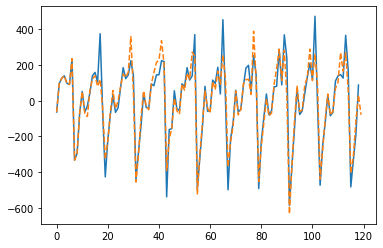

In [17]:
# 原系列の表示
plt.plot(y.diff().dropna().values, label = 'observation')
#1時点から11時点の原系列、モデルのあてはめに使用したデータ、
#ARモデルによる推定値を凍結した結果の表示

plt.plot(np.hstack([y_diff[:11],
                    result.fittedvalues,
                    result.predict(98-11, 107, dynamic = True)]),
         '--', label = 'forecast')